In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
static = np.load("static.npy")
tremor = np.load("tremor.npy")
normal = np.load("normal.npy")

print(np.shape(static))
print(np.shape(tremor))
print(np.shape(normal))

(4, 608)
(4, 594)
(4, 657)


In [3]:
def get_windows(data):
    window_size = 20
    num_windows = 200

    max_start_index = data.shape[1] - window_size
    start_indices = np.random.randint(0, max_start_index + 1, num_windows)

    windows = np.array([data[1:, start:start + window_size] for start in start_indices])

    print(windows.shape)
    return windows

In [4]:
static_windows = get_windows(static)
tremor_windows = get_windows(tremor)
normal_windows = get_windows(normal)

(200, 3, 20)
(200, 3, 20)
(200, 3, 20)


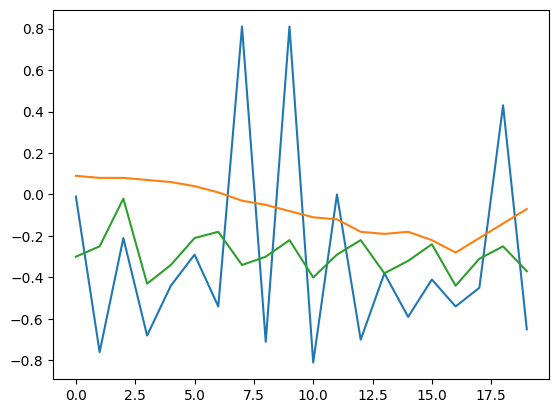

In [5]:
plt.plot(tremor_windows[0,0,:])
plt.plot(static_windows[0,0,:])
plt.plot(normal_windows[0,0,:])

In [6]:
def add_jitter(data, noise_level=0.05):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

In [7]:
def permute_data(data, num_segments=4):
    segments = np.array_split(data, num_segments, axis=2)
    np.random.shuffle(segments)
    return np.concatenate(segments, axis=2)

In [8]:
static_windows_jitter = add_jitter(static_windows)
normal_windows_jitter = add_jitter(normal_windows)
tremor_windows_jitter = add_jitter(tremor_windows)
static_windows_permute = permute_data(static_windows)
normal_windows_permute = permute_data(normal_windows)
tremor_windows_permute = permute_data(tremor_windows)

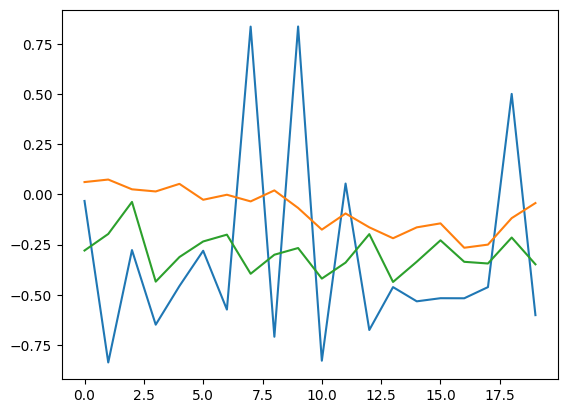

In [9]:
plt.plot(tremor_windows_jitter[0,0,:])
plt.plot(static_windows_jitter[0,0,:])
plt.plot(normal_windows_jitter[0,0,:])

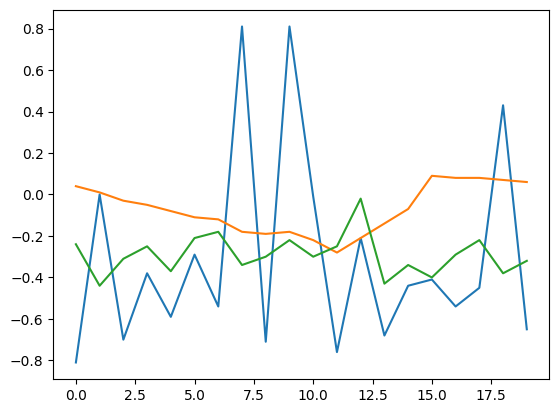

In [10]:
plt.plot(tremor_windows_permute[0,0,:])
plt.plot(static_windows_permute[0,0,:])
plt.plot(normal_windows_permute[0,0,:])

In [13]:
augmented_tremor = np.concatenate([tremor_windows,tremor_windows_permute,tremor_windows_jitter],axis=0)
augmented_normal = np.concatenate([normal_windows,normal_windows_permute,normal_windows_jitter],axis=0)
augmented_static = np.concatenate([static_windows,static_windows_permute,static_windows_jitter],axis=0)

gt_tremor = np.tile([1, 0, 0], (600, 1))
gt_normal = np.tile([0, 1, 0], (600, 1))
gt_static = np.tile([0, 0, 1], (600, 1))

In [14]:
np.savez("dataset.npz",augmented_tremor=augmented_tremor,augmented_normal=augmented_normal,augmented_static=augmented_static,gt_tremor=gt_tremor,gt_normal=gt_normal,gt_static=gt_static)